The Laplace equation
$$
u_{x x}+u_{y y}=0
$$
on the rectangle $0 \leq x \leq a, 0 \leq y \leq b$.
For
$$
\begin{array}{ll}
x_{i}=i \Delta x, & i=0,1, \ldots, n,\left(\text { so } \Delta x=\frac{a}{n}\right) \\
y_{j}=j \Delta y, & j=0,1, \ldots, m,\left(\text { so } \Delta y=\frac{b}{m}\right),
\end{array}
$$
The numerical sheme for central differences is
$$
\frac{u_{i+1, j}-2 u_{i, j}+u_{i-1, j}}{(\Delta x)^{2}}+\frac{u_{i, j+1}-2 u_{i, j}+u_{i, j-1}}{(\Delta y)^{2}}=0
$$
or
$$
u_{i, j}=\frac{1}{2\left[(\Delta x)^{2}+(\Delta y)^{2}\right]}\left[(\Delta x)^{2}\left(u_{i, j+1}+u_{i, j-1}\right)+(\Delta y)^{2}\left(u_{i+1, j}+u_{i-1, j}\right)\right]
$$
for $\Delta x=\Delta y$, we have

$$
u_{i, j}=\frac{u_{i, j+1}+u_{i, j-1}+u_{i+1, j}+u_{i-1, j}}{4}
$$
(Notice the mean value property). This is a $(n-1)^2 x (n-1)^2$ system, with unknowns $$
u_{i, j}, \quad i=1, \ldots, n-1 ; j=1, \ldots, n-1
$$
For $n$ large it is better to solve the system with an iterative method.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
def plot_3D(x, y, u):
    '''Creates 3D plot with appropriate limits and viewing angle

    Parameters:
    ----------
    x: array of float
        nodal coordinates in x
    y: array of float
        nodal coordinates in y
    p: 2D array of float
        calculated potential field

    '''
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax1 = fig.add_subplot(121, projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax1.plot_surface(X,Y,u[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$y$')
    ax1.set_zlabel('$z$')
    ax1.view_init(30,45)
    
    ax2 = fig.add_subplot(122)
    ax2.contourf(X, Y, u, cmap=cm.jet)
    
    
def plot_contour(x,y,u):
    '''Creates 2D contour plot

    Parameters:
    ----------
    u: array 
    '''
    nx,ny = u.shape
    X, Y = np.meshgrid(x,y)
    
    # Configure the contour
    plt.title("2d Laplace")
    plt.contourf(X, Y, u, cmap=cm.jet)

    # Set Colorbar
    plt.colorbar()

    # Show the result in the plot window
    plt.show()
    
#Iterate until l2 error is small or reac max iterations
def L2_error(u, un):
    return np.sqrt(np.sum((u - un)**2)/np.sum(un**2))

def set_bc_dir(u):
    u[-1, :] = 100 #top
    u[0, :] = 0 #bottom
    u[:, -1] = 0 #right
    u[:, 0] = 0 #left
    return u

def laplace2d(u, l2_target, maxIter, bc):
    '''Iteratively solves the Laplace equation using the Jacobi method

    Parameters:
    ----------
    u: 2D array of float
        Initial potential distribution
    l2_target: float
        target for the difference between consecutive solutions
    maxIter: int
        maximum iterations

    Returns:
    -------
    u: 2D array of float
        Potential distribution after relaxation
    '''

    l2norm = 1
    un = np.empty_like(u)
    nIter = 0
    while ((l2norm > l2_target) & (nIter < maxIter)):
        un = u.copy()
        u[1:-1,1:-1] = .25 * (un[1:-1,2:] + un[1:-1, :-2] \
                              + un[2:, 1:-1] + un[:-2, 1:-1])

        ##BC
        u = bc(u)
        
        l2norm = L2_error(u, un)
        
        nIter+=1
    print(nIter)    
    return u

400


NameError: name 'numpy' is not defined

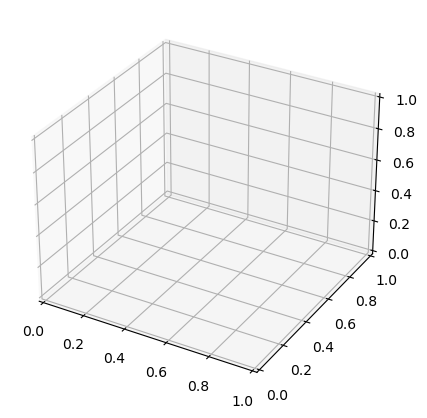

In [4]:
##variable declarations
nx = 41
ny = 41
nMax = 400
##initial conditions
u = np.zeros((ny,nx))
x = np.linspace(0,1,nx)
y = np.linspace(0,1,ny)
u = set_bc_dir(u)
u = laplace2d(u.copy(), 1e-8,nMax, set_bc_dir)
plot_3D(x, y, u)

#### Try different boundary conditions

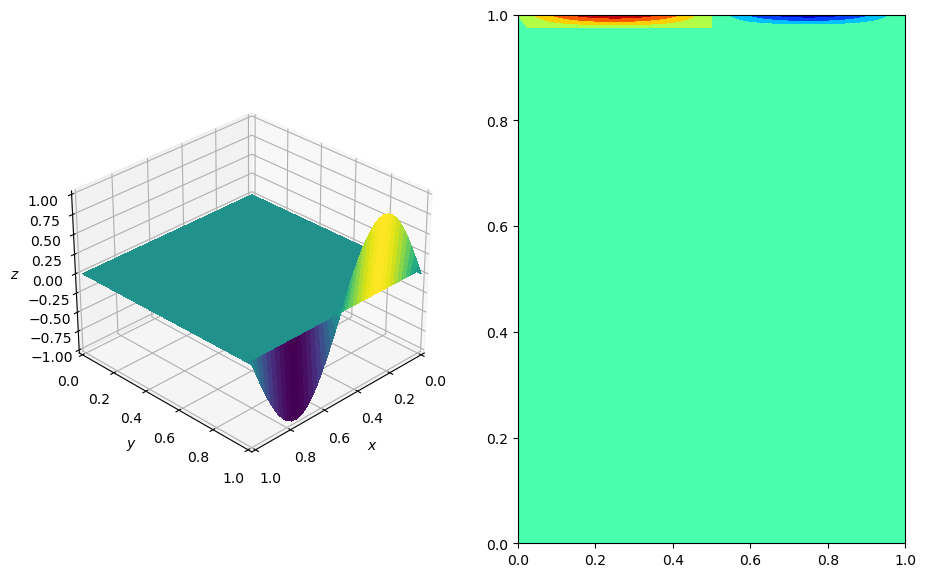

In [89]:
def set_bc2(u):
    u[-1, :] = np.sin(np.linspace(0,2*np.pi,u.shape[0])) #top
    u[0, :] = 0 #bottom
    u[:, -1] = 0 #right
    u[:, 0] = 0 #left
    return u

u = np.zeros((ny,nx))
u = set_bc2(u)
plot_3D(x, y, u)

400


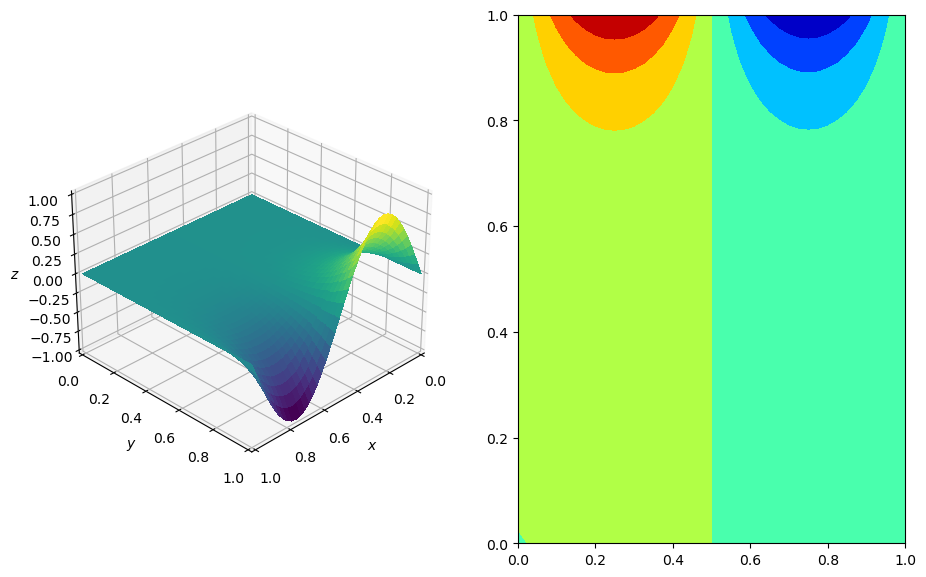

In [90]:
u = laplace2d(u.copy(), 1e-8,nMax, set_bc2)
plot_3D(x, y, u)

#### Neumann conditions

$$
\begin{gathered}
u=0 \text { at } x=0 \\
\frac{\partial u}{\partial x}=0 \text { at } x=1 \\
u=0 \text { at } y=0 \\
u=\sin \left(\frac{3}{2} \pi x\right) \text { at } y=1
\end{gathered}
$$


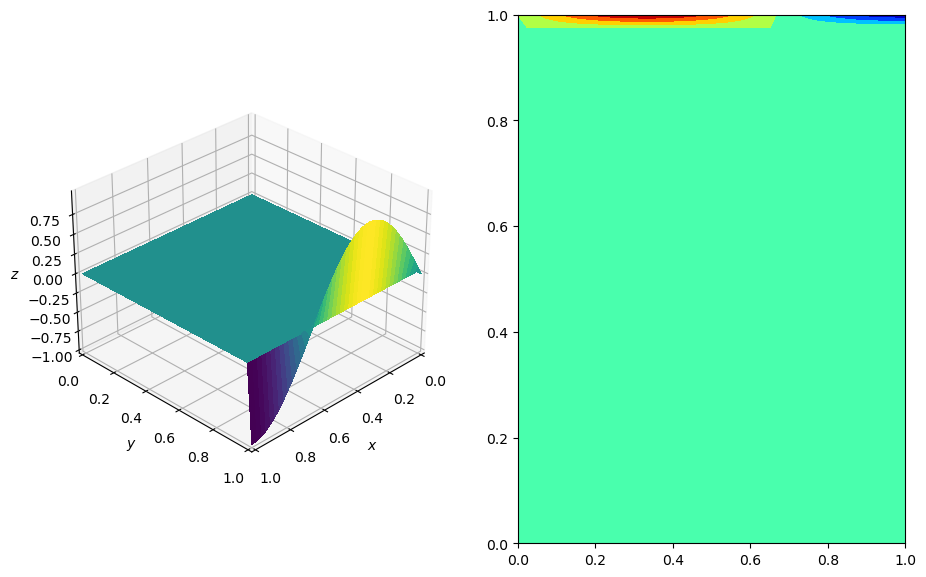

In [92]:
def set_bc2(u):
    u[-1, :] = np.sin((3*np.pi / 2) * np.linspace(0,1,u.shape[0])) #top
    u[0, :] = 0 #bottom
    u[1:-1, -1] = u[1:-1,-2] #right
    u[:, 0] = 0 #left
    return u

u = np.zeros((ny,nx))
u = set_bc2(u)
plot_3D(x, y, u)

400


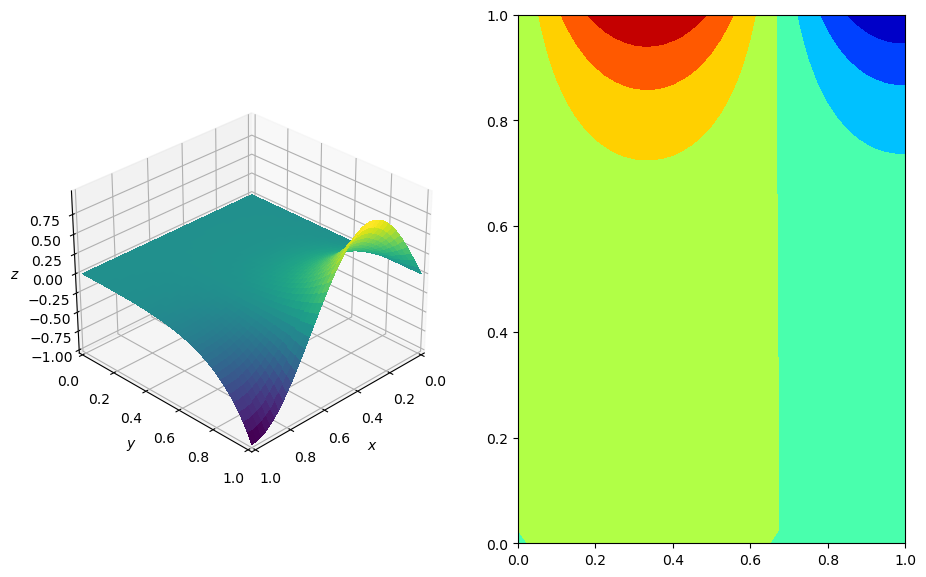

In [93]:
u = laplace2d(u.copy(), 1e-8,nMax, set_bc2)
plot_3D(x, y, u)